In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Data preparation

In [2]:
columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('abalone.data.csv', encoding='utf-8', header=None)
df.columns=columns

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.isnull().sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df['Sex'].astype(str)
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# Machine Learning
### Regression

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [8]:
df2 = pd.get_dummies(df, columns=['Sex'], prefix=['Sex'])
df2.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [9]:
y = df2.pop('Rings')
X = df2

In [10]:
dftrain, dfeval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=1)
print(dftrain.shape, y_train.shape, dfeval.shape, y_eval.shape)

(3341, 10) (3341,) (836, 10) (836,)


In [11]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
model = RandomForestRegressor(n_estimators=100)
model.fit(dftrain, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
predicted = model.predict(dfeval)

In [14]:
model.score(dftrain, y_train)

0.9361978405989994

In [15]:
model.score(dfeval, y_eval)

0.5311646221392201

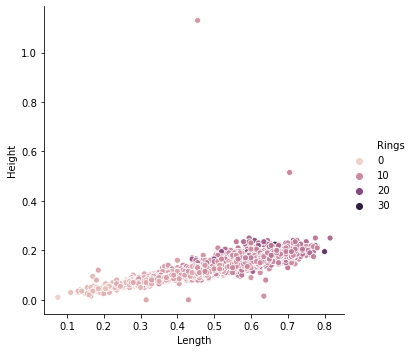

In [16]:
import seaborn as sns

sns.relplot(x="Length", y="Height", hue='Rings', data=df)

### Classification

In [17]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [18]:
df3 = df.copy()
b = df3.pop('Sex')
A = df3

In [19]:
dftrain_clf, dfeval_clf, y_train_clf, y_eval_clf = train_test_split(A, b, test_size=0.2, random_state=1)
print(dftrain_clf.shape, dfeval_clf.shape, y_train_clf.shape, y_eval_clf.shape)

(3341, 8) (836, 8) (3341,) (836,)


In [20]:
svm.SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
clf_01 = svm.SVC(C=1e3)
clf_01.fit(dftrain_clf, y_train_clf)

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
predicted = clf_01.predict(dfeval_clf)

In [23]:
clf_01.score(dftrain_clf, y_train_clf)

0.5645016462137085

In [24]:
clf_01.score(dfeval_clf, y_eval_clf)

0.5801435406698564

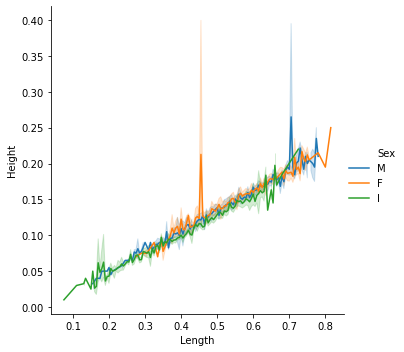

In [25]:
sns.relplot(x="Length", y="Height", hue='Sex', kind='line', data=df)

In [26]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
clf_02 = RandomForestClassifier(ccp_alpha=1e-3)
clf_02.fit(dftrain_clf, y_train_clf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.001, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
predicted = clf_02.predict(dfeval_clf)

In [29]:
clf_02.score(dftrain_clf, y_train_clf)

0.8138281951511523

In [30]:
clf_02.score(dfeval_clf, y_eval_clf)

0.5741626794258373

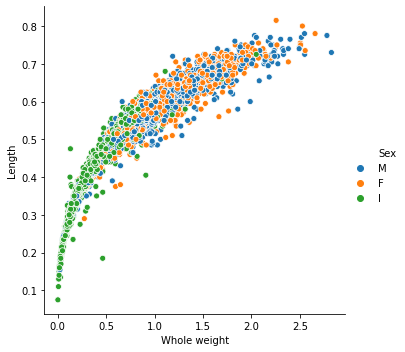

In [31]:
sns.relplot(x="Whole weight", y="Length", hue='Sex', data=df)